<a href="https://colab.research.google.com/github/Yashsharma009/Stock_price_prediction/blob/main/stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2010-01-01'
end = '2022-12-30'
stock = 'MSFT'

data = yf.download(stock, start ,end )

[*********************100%%**********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.474920,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.482512,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.338398,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.095684,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.254963,51197400
...,...,...,...,...,...,...
2022-12-22,241.259995,241.990005,233.869995,238.190002,236.096558,28651700
2022-12-23,236.110001,238.869995,233.940002,238.729996,236.631805,21207000
2022-12-27,238.699997,238.929993,235.830002,236.960007,234.877350,16688600


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.474920,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.482512,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.338398,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.095684,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.254963,51197400


In [5]:
data.reset_index(inplace = True )

In [6]:
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.474920,38409100
1,2010-01-05,30.850000,31.100000,30.639999,30.959999,23.482512,49749600
2,2010-01-06,30.879999,31.080000,30.520000,30.770000,23.338398,58182400
3,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.095684,50559700
4,2010-01-08,30.280001,30.879999,30.240000,30.660000,23.254963,51197400
...,...,...,...,...,...,...,...
3266,2022-12-22,241.259995,241.990005,233.869995,238.190002,236.096558,28651700
3267,2022-12-23,236.110001,238.869995,233.940002,238.729996,236.631805,21207000
3268,2022-12-27,238.699997,238.929993,235.830002,236.960007,234.877350,16688600
3269,2022-12-28,236.889999,239.720001,234.169998,234.529999,232.468719,17457100


moving avearge for 100 days

In [7]:
ma_100_days = data.Close.rolling(100).mean()

plotting a graph

<function matplotlib.pyplot.show(close=None, block=None)>

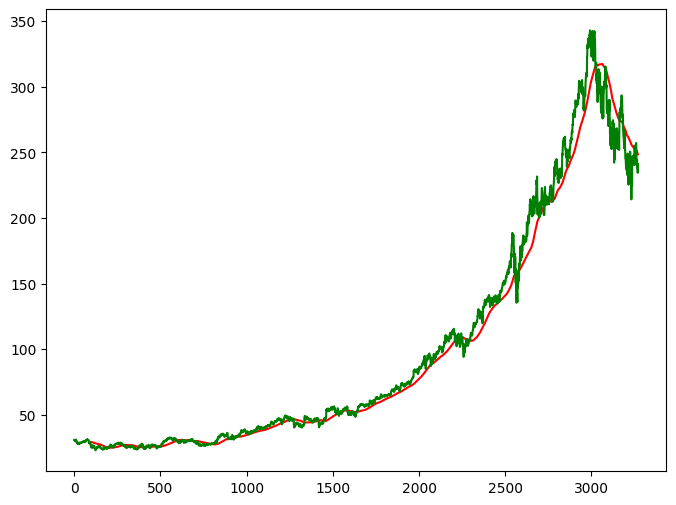

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r' ,label='ma_100_days')
plt.plot(data.Close, 'g' ,label='Close')
plt.legend
plt.show

In [9]:
ma_200_days = data.Close.rolling(200).mean()


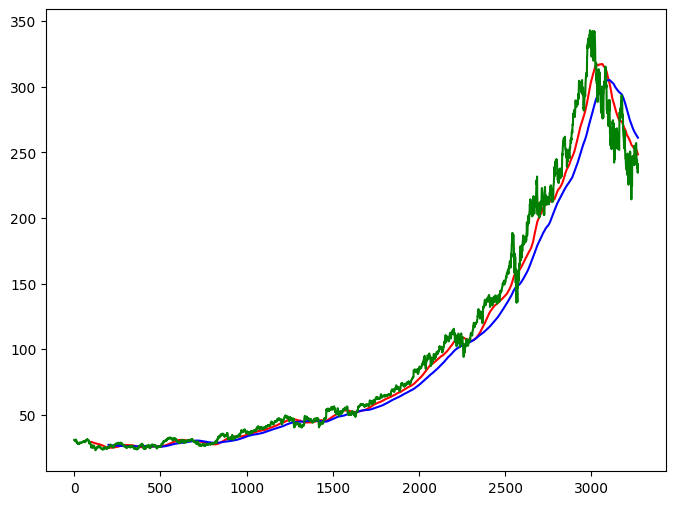

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [11]:
data.dropna(inplace=True)

In [12]:
data.Close

0        30.950001
1        30.959999
2        30.770000
3        30.450001
4        30.660000
           ...    
3266    238.190002
3267    238.729996
3268    236.960007
3269    234.529999
3270    241.009995
Name: Close, Length: 3271, dtype: float64

In [13]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [14]:
data_train.shape[0], data_test.shape[0]

(2616, 655)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_scale = scaler.fit_transform(data_train)

In [17]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [18]:
x,y = np.array(x), np.array(y)

In [19]:
y = y.reshape(-1, 1)

In [20]:
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True,))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True,))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu',))
model.add(Dropout(0.5))

In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
79/79 [==============================] - 50s 637ms/step - loss: 48.9094
Epoch 2/50
79/79 [==============================] - 54s 673ms/step - loss: 0.1030
Epoch 3/50
79/79 [==============================] - 52s 656ms/step - loss: 0.0949
Epoch 4/50
79/79 [==============================] - 52s 660ms/step - loss: 49420328960.0000
Epoch 5/50
79/79 [==============================] - 50s 630ms/step - loss: 0.0949
Epoch 6/50
79/79 [==============================] - 51s 643ms/step - loss: 2424.3838
Epoch 7/50
79/79 [==============================] - 52s 653ms/step - loss: 0.0988
Epoch 8/50
79/79 [==============================] - 52s 654ms/step - loss: 0.0960
Epoch 9/50
79/79 [==============================] - 50s 631ms/step - loss: 0.0922
Epoch 10/50
79/79 [==============================] - 52s 658ms/step - loss: 0.0931
Epoch 11/50
79/79 [==============================] - 52s 659ms/step - loss: 0.0922
Epoch 12/50
79/79 [==============================] - 51s 641ms/step - loss: 0.0905

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [49]:
past_100_days = data_train.tail(100)

In [50]:
data_test = pd.concat([past_100_days,data_test], ignore_index = True)

In [51]:
data_test_scale = scaler.fit_transform(data_test)

In [52]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [53]:
y_predict = model.predict(x)

24/24 [==============================] - 1s 58ms/step


In [54]:
scale = 1/scaler.scale_

In [55]:
y_predict = y_predict*scale

In [56]:
y = y*scale


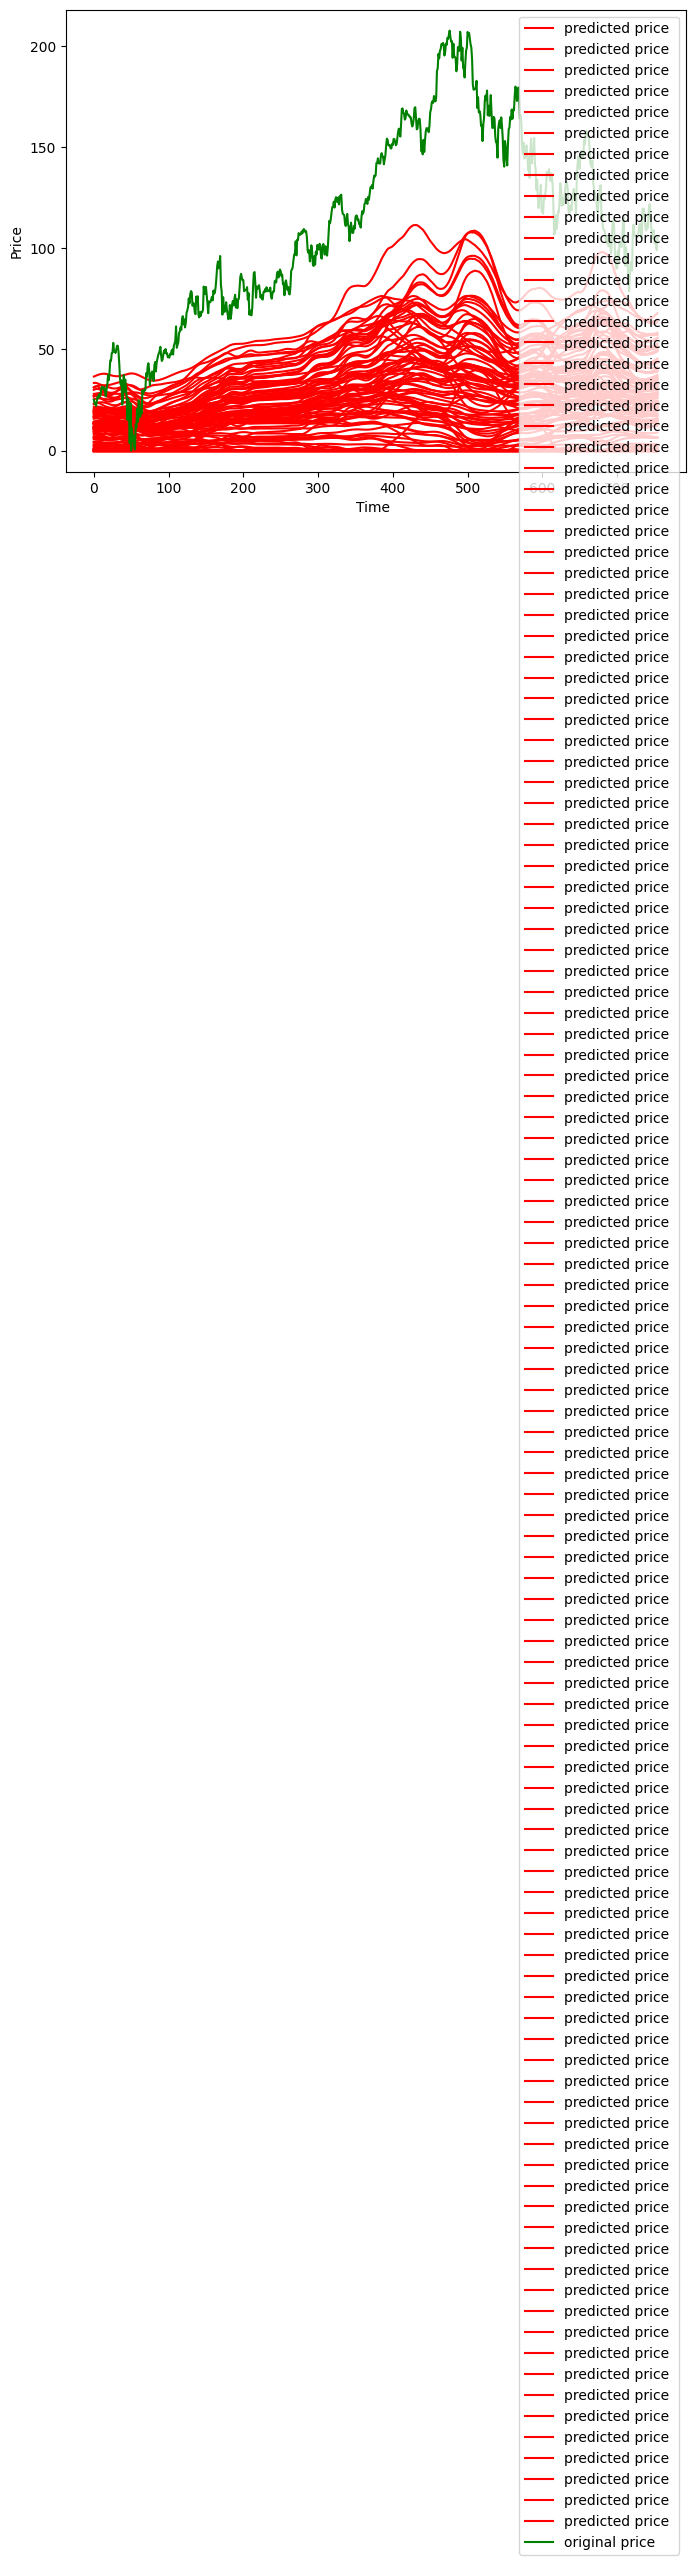

In [57]:
plt.figure(figsize= (8,6))
plt.plot(y_predict, 'r', label = 'predicted price ')
plt.plot(y, 'g', label = 'original price ')
plt.xlabel('Time ')
plt.ylabel('Price')
plt.legend()
plt.show()

27/27 [==============================] - 3s 93ms/step


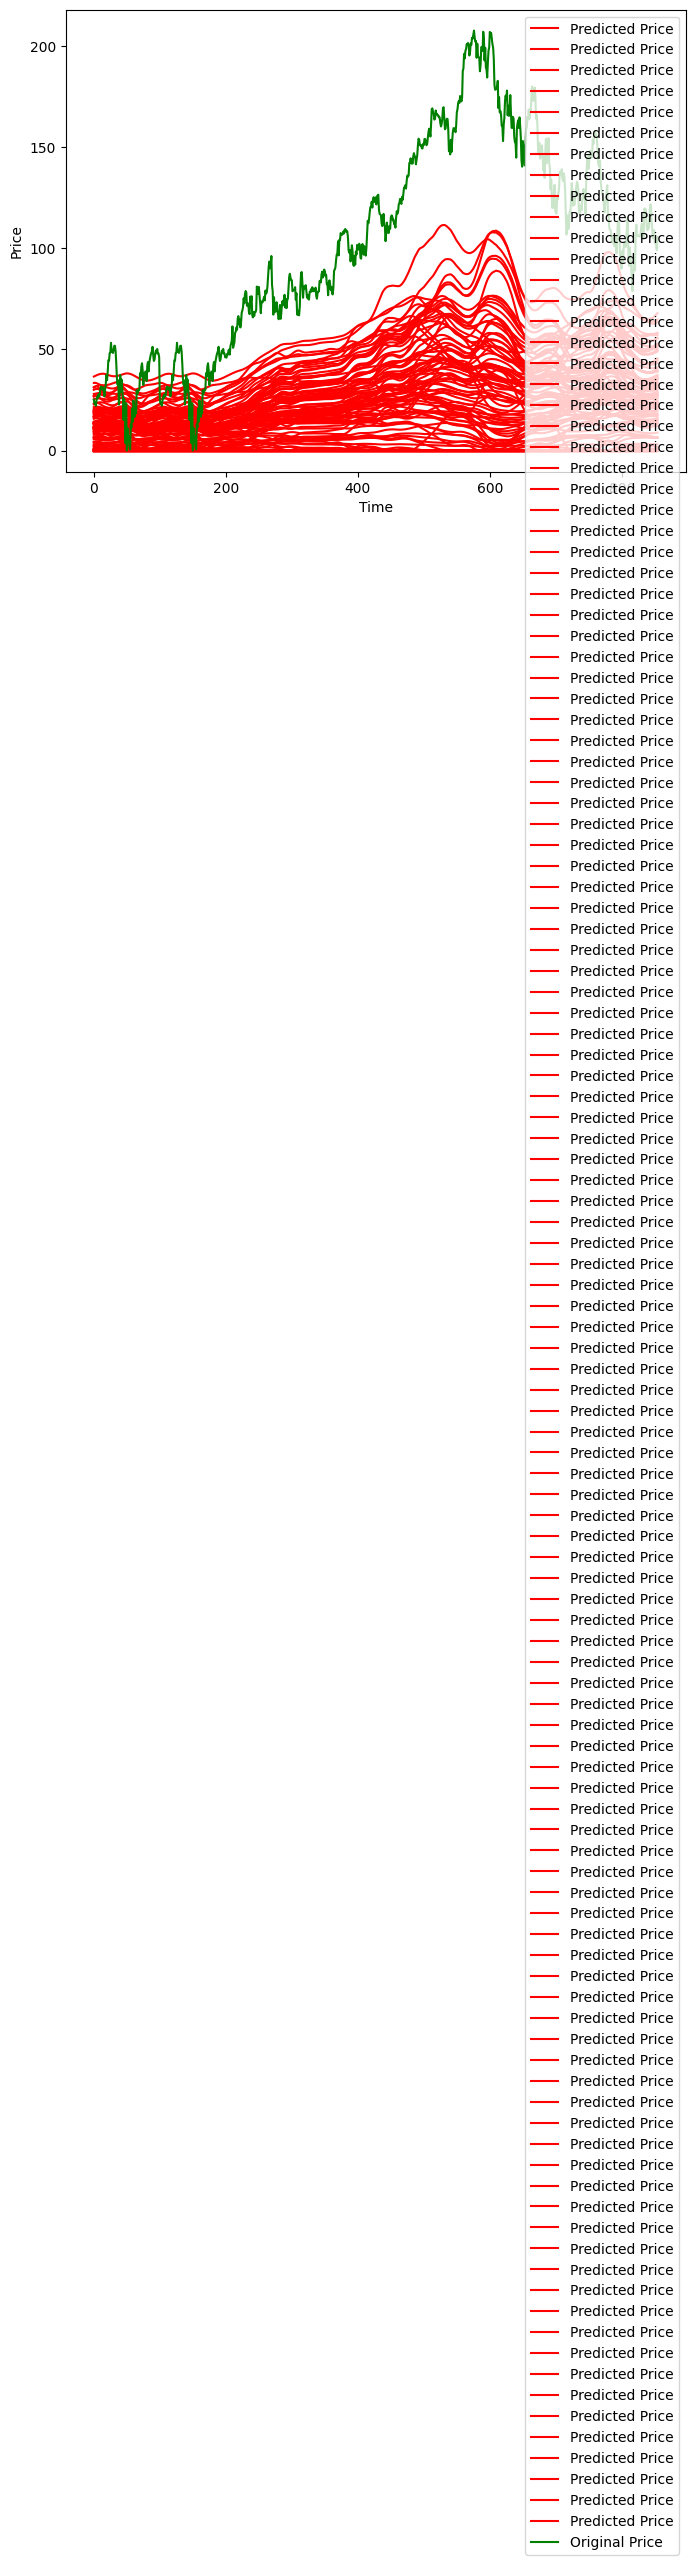

In [58]:
past_100_days = data_train.tail(100)
data_test = pd.concat([past_100_days, data_test], ignore_index=True)
data_test_scale = scaler.transform(data_test)  # Use transform instead of fit_transform for test data

x = []
y = []

# Create sequences for prediction
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i, 0])

x, y = np.array(x), np.array(y)

# Make predictions
y_predict = model.predict(x)

# Inverse scaling
scale = 1/scaler.scale_
y_predict = y_predict * scale
y = y * scale

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [59]:
model.save('stock predicion model.keras')